In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('ColourXY.csv')
data.head()

,x,y,color
0,144.475109,101.450265,0
1,370.683312,298.003415,2
2,253.714046,234.079402,1
3,148.699165,78.654006,0
4,192.157973,252.837304,1


In [113]:
data=data.drop(['color'],axis=1)
data.dropna(inplace=True)

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['x','y']] = scaler.fit_transform(data[['x','y']])
data.head()

,x,y
0,-1.147198,-1.245985
1,1.249969,1.214316
2,0.010426,0.414164
3,-1.102435,-1.531331
4,-0.641894,0.648962


In [115]:
from sklearn.model_selection import train_test_split
X = data['x'].to_numpy()
Y = data['y'].to_numpy()
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.3)
train_data = []
for i in range(len(train_x)):
  train_data.append([train_x[i],train_y[i]])

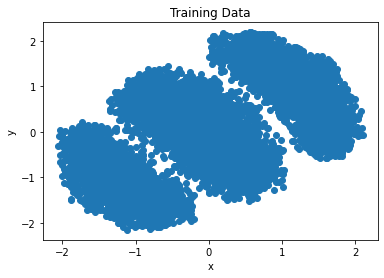

In [116]:
plt.scatter(train_x,train_y)
plt.title('Training Data')
plt.xlabel("x")
plt.ylabel('y')
plt.show()

In [117]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
  model = KMeans(n_clusters = k, init = 'k-means++')
  model.fit(train_data)
  # Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
  wcss.append(model.inertia_)

In [118]:
wcss              

[17575.08189592339,
 8038.37305957177,
 5012.679337756757,
 3533.6121986686303,
 2538.990666739417,
 1938.0663349077624,
 1665.1807136967336,
 1427.7931290569966,
 1275.3096262821332,
 1154.8319074156748]

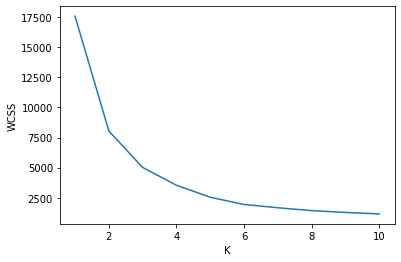

In [119]:
plt.plot([i for i in range(1,11)],wcss)
plt.xlabel("K")
plt.ylabel("WCSS")
plt.show()

In [120]:
random_point = np.array([150,80])
scaled_ = scaler.transform(random_point.reshape(1,-1))
scaled_

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.08864964, -1.51448337]])

In [121]:
model = KMeans(n_clusters=3)
model.fit(train_data)
model.predict(scaled_.reshape(1, -1))

array([1])

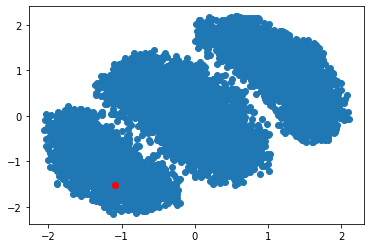

In [122]:
plt.scatter(train_x,train_y)
plt.scatter(scaled_[0][0],scaled_[0][1],color='red')